**Step 1: Installing pycocotools**


The pycocotools package is a Python library that provides convenient tools for working with the COCO dataset.

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'coco-2014-dataset-for-yolov3:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1573501%2F2598787%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240227%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240227T054800Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D424e98245fb0aa525a8566980abb3213875e4673f30d6164d3dce4d2def53f1da303c1cc4cf2b1e6783f7c36b7eb18135b4741c2a46449d2006a7075da55793c67cd39891745f73898bbcd2d1be1964b8ba3803a93efcad2a7b343ce4522811c9ba8849fece51a3d832c58dccc9db54103ece514a435def0adedaaab5f25d80ad07bb447c2a67403f2e92803e280266f293fb9d037c9e7a26305013fbf4f73f492d987d9a2a0a87b91e58a89cb62e726049981625fa7aa13deba7babd59101e092e69d14ca7d00843f30857d074d70f9eee92927680432e1c5740ace3a133a34c8033a8ee2abb1cb40f5f7c3bf42db1e9425950736067175145e26feb3a7f8c5'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 26852690979 bytes downloaded
Downloaded and uncompressed: coco-2014-dataset-for-yolov3
Data source import complete.


In [ ]:
!pip install pycocotools

**Install the Prerequisites**

In [ ]:
!pip install --upgrade scikit-image scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 11.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.19.3
    Uninstalling scikit-image-0.19.3:
      Successfully uninstalled scikit-image-0.19.3


In [ ]:
!pip uninstall -y numpy==1.23.5
!pip install "numpy>=1.16.5, <1.23.0"

Found existing installation: numpy 1.25.2
Uninstalling numpy-1.25.2:
  Successfully uninstalled numpy-1.25.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 23.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.85 requires numpy>=1.24.1, but you have numpy 1.22.4 which is incompatible.
plotnine 0.12.4 requires numpy>=1.23.0, but you have numpy 1.22.4 which is incompatible.
tensorflow 2.15.0 requires numpy<2.0.0,>=1.23.5, but you have numpy 1.22.4 which is incompatible.


**Step 2: Importing Required Libraries**

Importing certain libraries that will be used for data visualization and processing.

In [ ]:
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors
import seaborn as sns
import numpy as np

from random import shuffle
from PIL import Image

from pycocotools.coco import COCO

**Step 3: Setting Up COCO Dataset and Initializing API**



Setting up the COCO dataset and initialize the COCO API for working with instance annotations.

Set the variable **dataDir** to the path of your COCO dataset directory.

Set the variable **dataType** to the specific data split you want to work with.

Use the **annFile** variable to define the path to the COCO dataset's instance annotation file.

Set the **imageDir** variable to the path of the directory containing the dataset images.

Create an instance of the COCO class by passing the annotation file path **(annFile)** to the constructor. This initializes the COCO API and allows you to access various methods for interacting with the dataset.

In [ ]:
dataDir='/kaggle/input/coco-2014-dataset-for-yolov3/coco2014/'
dataType='val2014'
annFile='{}annotations/instances_{}.json'.format(dataDir,dataType)
imageDir = '{}/images/{}/'.format(dataDir, dataType)

# Initialize the COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=10.40s)
creating index...
index created!


**Step 4: Loading Categories from COCO Dataset**



loading the categories from the COCO dataset based on the provided category IDs.

Setting the variable **ids** to the category ID(s) you want to load from the COCO dataset. ids is set to 1, indicating that we want to load the category with ID 1.

Use the **loadCats(ids)** method of the COCO API to load the categories. here ids variable as an argument to the method. and store them with cats variable.

Use the **print()** function to display the loaded categories.




In [ ]:
# Load categories for the given ids
ids = 1
cats = coco.loadCats(ids=ids)
print(cats)

[{'supercategory': 'person', 'id': 1, 'name': 'person'}]


Also, you can print all the categories by the following code:

In [ ]:
category_ids = coco.getCatIds()
num_categories = len(category_ids)
print('number of categories: ',num_categories)
for ids in category_ids:
    cats = coco.loadCats(ids=ids)
    print(cats)

number of categories:  80
[{'supercategory': 'person', 'id': 1, 'name': 'person'}]
[{'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'}]
[{'supercategory': 'vehicle', 'id': 3, 'name': 'car'}]
[{'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'}]
[{'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'}]
[{'supercategory': 'vehicle', 'id': 6, 'name': 'bus'}]
[{'supercategory': 'vehicle', 'id': 7, 'name': 'train'}]
[{'supercategory': 'vehicle', 'id': 8, 'name': 'truck'}]
[{'supercategory': 'vehicle', 'id': 9, 'name': 'boat'}]
[{'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'}]
[{'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'}]
[{'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'}]
[{'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'}]
[{'supercategory': 'outdoor', 'id': 15, 'name': 'bench'}]
[{'supercategory': 'animal', 'id': 16, 'name': 'bird'}]
[{'supercategory': 'animal', 'id': 17, 'name': 'cat'}]
[{'supercategory': 'animal',

**Step 5: Loading Images from COCO Dataset**



loading images from the COCO dataset based on the provided image IDs.

Use the **getImgIds()** method of the COCO API to retrieve a list of all image IDs in the dataset.

Set the variable **image_id** to the specific image ID you want to load from the COCO dataset. here **image_ids[0]**, which corresponds to the first image ID in the list.

Use the **loadImgs(image_id)** method of the COCO API to load the image information for the specified image ID.

Use the **print()** function to display the loaded image information.

In [ ]:
# Load images for the given ids
image_ids = coco.getImgIds()
image_id = image_ids[0]  # Change this line to display a different image
image_info = coco.loadImgs(image_id)
print(image_info)

[{'license': 3, 'file_name': 'COCO_val2014_000000391895.jpg', 'coco_url': 'http://mscoco.org/images/391895', 'height': 360, 'width': 640, 'date_captured': '2013-11-14 11:18:45', 'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg', 'id': 391895}]


**Step 6: Loading Annotations from COCO Dataset**



loading annotations from the COCO dataset based on the provided image IDs.

Use the **getAnnIds(imgIds=image_id)** method of the COCO API to retrieve a list of annotation IDs for a specific image. here image_id variable as an argument to the method.

Use the **loadAnns(annotation_ids)** method of the COCO API to load the annotations corresponding to the provided annotation IDs.

Use the **print()** function to display the loaded annotations.

In [ ]:
# Load annotations for the given ids
annotation_ids = coco.getAnnIds(imgIds=image_id)
annotations = coco.loadAnns(annotation_ids)
print(annotations)

[{'segmentation': [[376.97, 176.91, 398.81, 176.91, 396.38, 147.78, 447.35, 146.17, 448.16, 172.05, 448.16, 178.53, 464.34, 186.62, 464.34, 192.28, 448.97, 195.51, 447.35, 235.96, 441.69, 258.62, 454.63, 268.32, 462.72, 276.41, 471.62, 290.98, 456.25, 298.26, 439.26, 292.59, 431.98, 308.77, 442.49, 313.63, 436.02, 316.86, 429.55, 322.53, 419.84, 354.89, 402.04, 359.74, 401.24, 312.82, 370.49, 303.92, 391.53, 299.87, 391.53, 280.46, 385.06, 278.84, 381.01, 278.84, 359.17, 269.13, 373.73, 261.85, 374.54, 256.19, 378.58, 231.11, 383.44, 205.22, 385.87, 192.28, 373.73, 184.19]], 'area': 12190.44565, 'iscrowd': 0, 'image_id': 391895, 'bbox': [359.17, 146.17, 112.45, 213.57], 'category_id': 4, 'id': 151091}, {'segmentation': [[352.55, 146.82, 353.61, 137.66, 356.07, 112.66, 357.13, 94.7, 357.13, 84.49, 363.12, 73.92, 370.16, 68.64, 370.16, 66.53, 368.4, 63.71, 368.05, 54.56, 361.0, 53.85, 356.07, 50.33, 356.43, 46.46, 364.17, 42.23, 369.1, 35.89, 371.22, 30.96, 376.85, 26.39, 383.54, 22.16, 

**Step 7: Filtering Category IDs based on Given Conditions**



filtering the category IDs from the COCO dataset based on certain conditions.

Set the variable **filterClasses** to a list of category names or classes that you want to filter.

Use the **getCatIds(catNms=filterClasses)** method of the COCO API to retrieve the category IDs that satisfy the given filter conditions.

Use the **print()** function to display the filtered category IDs.

In [ ]:
# Get category ids that satisfy the given filter conditions
filterClasses = ['laptop', 'tv', 'cell phone']
# Fetch class IDs only corresponding to the filterClasses
catIds = coco.getCatIds(catNms=filterClasses)
print(catIds)

[72, 73, 77]


**Step 8: Loading Category Information and Filtering Image IDs**



loading category information based on a specific category ID and filter image IDs that satisfy certain conditions.

Set the variable **catID** to the specific category ID for which you want to load information.

Use the **loadCats(ids=catID)** method of the COCO API to load the category information corresponding to the provided category ID.

Use the **getImgIds(catIds=[catID])** method of the COCO API to retrieve a list of image IDs that satisfy the given filter conditions.

Use the **print()** function to display the filtered image ID.

In [ ]:
catID = 15
print(coco.loadCats(ids=catID))

# Get image ids that satisfy the given filter conditions
imgId = coco.getImgIds(catIds=[catID])[0]
print(imgId)

[{'supercategory': 'outdoor', 'id': 15, 'name': 'bench'}]
262148


**Step 9: Retrieving Annotation IDs for an Image**



Retrieving the annotation IDs for a specific image ID from the COCO dataset.

Use the **getAnnIds(imgIds=[imgId], iscrowd=None)** method of the COCO API to retrieve the annotation IDs for the given **image ID**. here imgId variable as an argument to the method within a list. Setting **iscrowd** to None ensures that both crowd and non-crowd annotations are included.

Use the **print()** function to display the retrieved annotation IDs.

In [ ]:
ann_ids = coco.getAnnIds(imgIds=[imgId], iscrowd=None)
print(ann_ids)

[247584, 576412, 642663, 1209372, 1251030, 1272930, 1277823, 1303789, 1307874, 1312222, 1312550, 1321181, 1324108, 1331011, 1332687, 1371763, 1372845, 1422576, 1837952, 1962686, 2007683, 2061640, 900100262148]


**Step 10: Displaying Image with Annotations**



Displaying an image from the COCO dataset along with its corresponding annotations.

Use the **print()** function to display information about the image that will be visualized.

Use the **plt.imread()** function from the matplotlib library to load the image from the specified image directory **(imageDir + image_path)**. Store the image in the image variable. Then, use the **plt.imshow()** function to display the image.

Use various functions from the **plt** module to customize the plot appearance. Use **plt.axis('off')** to turn off the axis labels, **plt.title()** to set a title for the plot, and **plt.tight_layout()** to optimize the layout of the plot.

Finally, use **plt.show()** to display the plot with the image and annotations.

Annotations for Image ID 262148:
COCO_val2014_000000262148.jpg


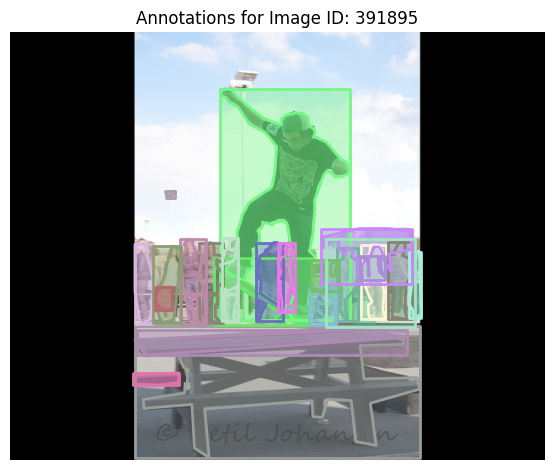

In [ ]:
print(f"Annotations for Image ID {imgId}:")
anns = coco.loadAnns(ann_ids)

image_path = coco.loadImgs(imgId)[0]['file_name']
print(image_path)
image = plt.imread(imageDir + image_path)
plt.imshow(image)

# Display the specified annotations
coco.showAnns(anns, draw_bbox=True)

plt.axis('off')
plt.title('Annotations for Image ID: {}'.format(image_id))
plt.tight_layout()
plt.show()

**Step 11: Displaying Images with Annotations**



loading images from the COCO dataset and display them along with their corresponding annotations. This will allow us to visualize the annotated objects in the images.

Use the **getImgIds()** method of the COCO API to retrieve a list of image IDs that contain specific categories.can specify the category IDs or names using the **catIds** parameter.

Choose an image ID from the retrieved list to display.

Use the **loadImgs()** method of the COCO API to load the image information for the selected image ID.

Use the **getAnnIds()** method of the COCO API to retrieve the annotation IDs for the selected image ID.

Use the **loadAnns()** method of the COCO API to load the annotations corresponding to the retrieved annotation IDs.

Use a suitable image processing library such as PIL or matplotlib to load and display the image.

Use the **showAnns()** method of the COCO API to display the annotations on top of the image.

Use various functions from the chosen image processing library to customize the plot appearance. You can add titles, labels, or adjust the axis settings as desired.

Finally, use the appropriate function from the image processing library to display the plot with the image and annotations.

Number of Unique Categories: 80
Category IDs:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90]
Categories Names:
['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted

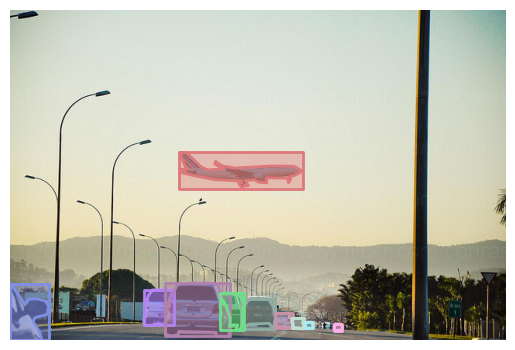

In [ ]:
def main():

    # Category IDs.
    cat_ids = coco.getCatIds()
    print(f"Number of Unique Categories: {len(cat_ids)}")
    print("Category IDs:")
    print(cat_ids)  # The IDs are not necessarily consecutive.

    # All categories.
    cats = coco.loadCats(cat_ids)
    cat_names = [cat["name"] for cat in cats]
    print("Categories Names:")
    print(cat_names)

    # Category ID -> Category Name.
    query_id = cat_ids[0]
    query_annotation = coco.loadCats([query_id])[0]
    query_name = query_annotation["name"]
    query_supercategory = query_annotation["supercategory"]
    print("Category ID -> Category Name:")
    print(
        f"Category ID: {query_id}, Category Name: {query_name}, Supercategory: {query_supercategory}"
    )

    # Category Name -> Category ID.
    query_name = cat_names[2]
    query_id = coco.getCatIds(catNms=[query_name])[0]
    print("Category Name -> ID:")
    print(f"Category Name: {query_name}, Category ID: {query_id}")

    # Get the ID of all the images containing the object of the category.
    img_ids = coco.getImgIds(catIds=[query_id])
    print(f"Number of Images Containing {query_name}: {len(img_ids)}")

    # Pick one image.
    img_id = img_ids[2]
    img_info = coco.loadImgs([img_id])[0]
    img_file_name = img_info["file_name"]
    img_url = img_info["coco_url"]
    print(
        f"Image ID: {img_id}, File Name: {img_file_name}, Image URL: {img_url}"
    )

    # Get all the annotations for the specified image.
    ann_ids = coco.getAnnIds(imgIds=[img_id], iscrowd=None)
    anns = coco.loadAnns(ann_ids)
    print(f"Annotations for Image ID {img_id}:")
    print(anns)

    # Use URL to load image.
    # im = Image.open(requests.get(img_url, stream=True).raw)
    # Load image from dataset
    im = plt.imread(imageDir+ coco.loadImgs(img_id)[0]['file_name'])
    # Save image and its labeled version.
    plt.axis("off")
    plt.imshow(np.asarray(im))
    plt.savefig(f"{img_id}.jpg", bbox_inches="tight", pad_inches=0)
    # Plot segmentation and bounding box.
    coco.showAnns(anns, draw_bbox=True)
    plt.savefig(f"{img_id}_annotated.jpg", bbox_inches="tight", pad_inches=0)
    plt.show()
    return


if __name__ == "__main__":

    main()

**Step 12: Visualizing Category Distribution in the COCO Dataset**



Visualize the distribution of categories in the COCO dataset using a horizontal bar plot.

Use the **getCatIds()** method of the COCO API to retrieve the category IDs present in the dataset.

Extract the category names from the loaded category information.

 Iterate over the category IDs in the **catIDs** variable and use the **getImgIds()** method to retrieve the image IDs associated with each category. Then, calculate the length of each image ID list to obtain the count of images for each category. Store the category counts in the **category_counts** variable.

 Use the **sns.color_palette()** function from the seaborn library to create a color palette for the plot.

 Create a figure with a specified size using **plt.figure(figsize=(11, 15))**. Use the **sns.barplot()** function from the seaborn library to create the horizontal bar plot. Pass the **category_counts** as the x-values, **category_names** as the y-values, and **colors** as the palette. This will create a bar for each category with its corresponding count.

 Iterate over the **category_counts** and **category_names** using **enumerate().**

 Add labels to the x-axis **(plt.xlabel())** and y-axis **(plt.ylabel())**, and a title to the plot **(plt.title())**.

Use **plt.savefig()** to save the plot as an image file and with a specified DPI (e.g., dpi=300). Finally, use **plt.show()** to display the plot.

<ipython-input-17-b580b56505af>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts, y=category_names, palette=colors)


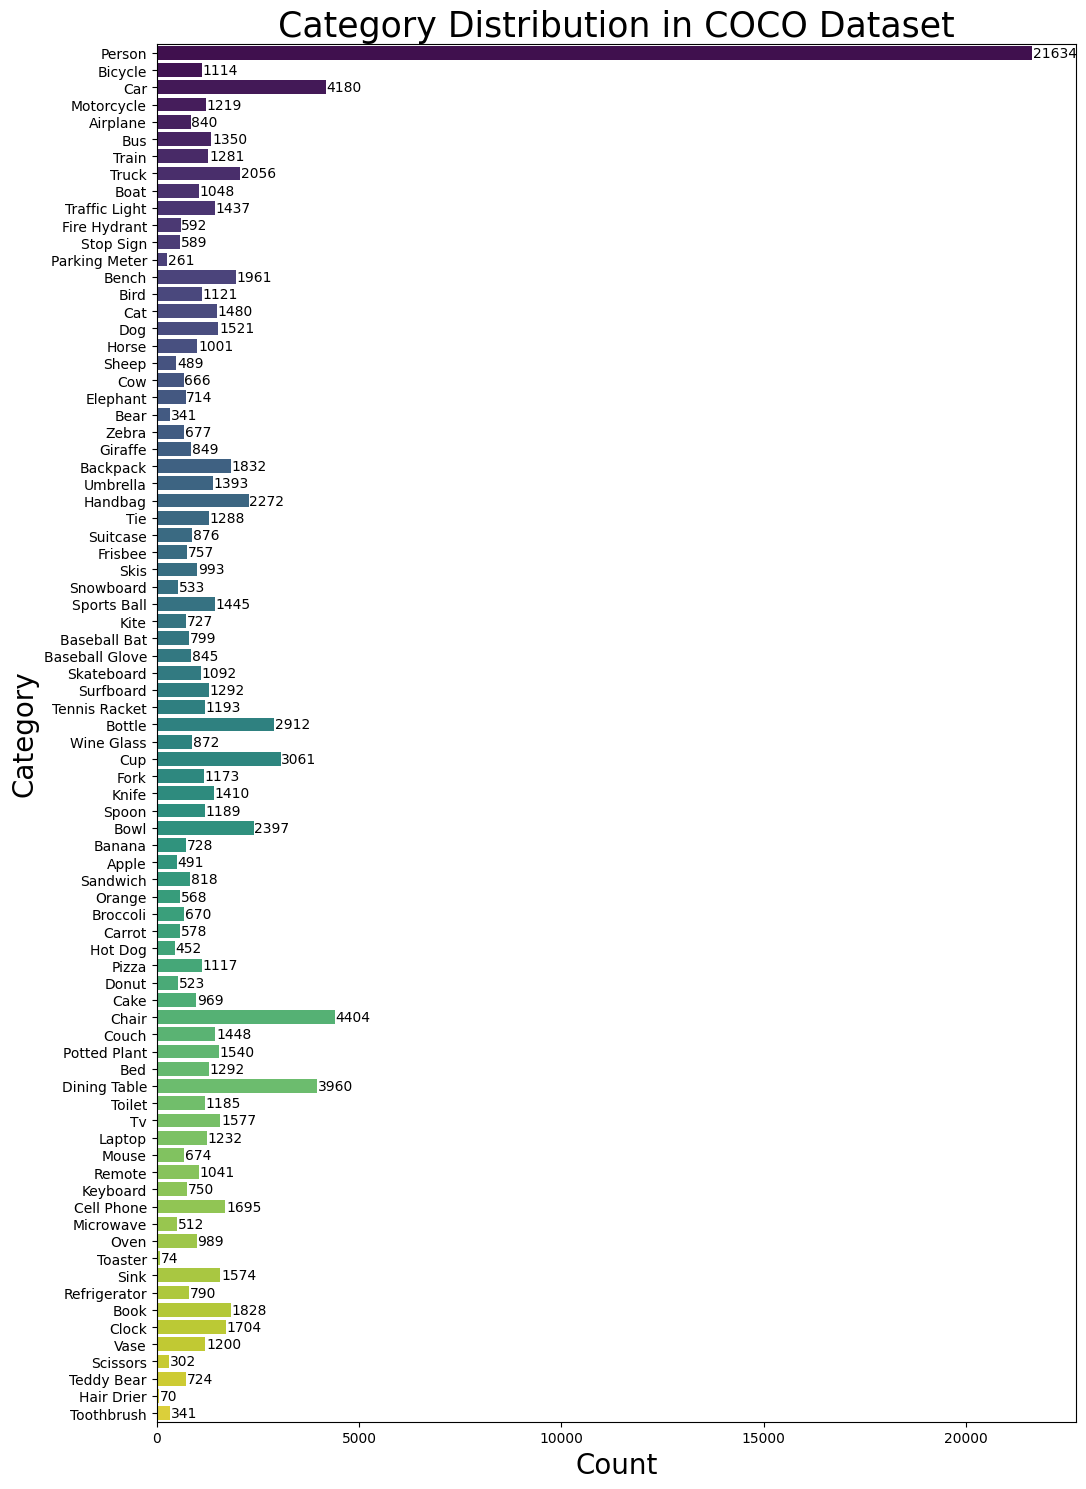

In [ ]:

# Load the categories in a variable
catIDs = coco.getCatIds()
cats = coco.loadCats(catIDs)

# Get category names
category_names = [cat['name'].title() for cat in cats]

# Get category counts
category_counts = [coco.getImgIds(catIds=[cat['id']]) for cat in cats]
category_counts = [len(img_ids) for img_ids in category_counts]


# Create a color palette for the plot
colors = sns.color_palette('viridis', len(category_names))

# Create a horizontal bar plot to visualize the category counts
plt.figure(figsize=(11, 15))
sns.barplot(x=category_counts, y=category_names, palette=colors)

# Add value labels to the bars
for i, count in enumerate(category_counts):
    plt.text(count + 20, i, str(count), va='center')
plt.xlabel('Count',fontsize=20)
plt.ylabel('Category',fontsize=20)
plt.title('Category Distribution in COCO Dataset',fontsize=25)
plt.tight_layout()
plt.savefig('coco-cats.png',dpi=300)
plt.show()

**Step 13: Visualizing Category Distribution as a Pie Chart**



visualize the distribution of categories in the COCO dataset as a pie chart. This type of chart allows for easy comparison of category proportions within the dataset.

Calculate category percentages-count out of the total count of all categories

Create a figure with a specified size using **plt.figure(figsize=(15, 24.9))**

Defining the labels for the pie chart using the category names and corresponding percentages. Customize the label properties, such as font size and background color, using the **label_props** dictionary

Use the **plt.pie()** function to create the pie chart. Set **autopct=''** to hide the default percentage labels. Specify **startangle=90** to rotate the pie chart to start from the 90-degree angle **(12 o'clock position)**. Use the **textprops** parameter to apply the label properties defined earlier. Set **pctdistance=0.85** to move the labels away from the center of the pie chart.

Use the **plt.legend()** function to create the legend.

Adjust the plot aspect ratio using **plt.axis('equal')**. Add a title to the plot using **plt.title()**. Set the font size and adjust the layout of the plot using **plt.tight_layout()**.

Use **plt.savefig()** to save the plot as an image file (e.g., 'coco-dis.png') with a specified **DPI** (e.g., dpi=300).

Finally, use **plt.show()** to display the pie chart.


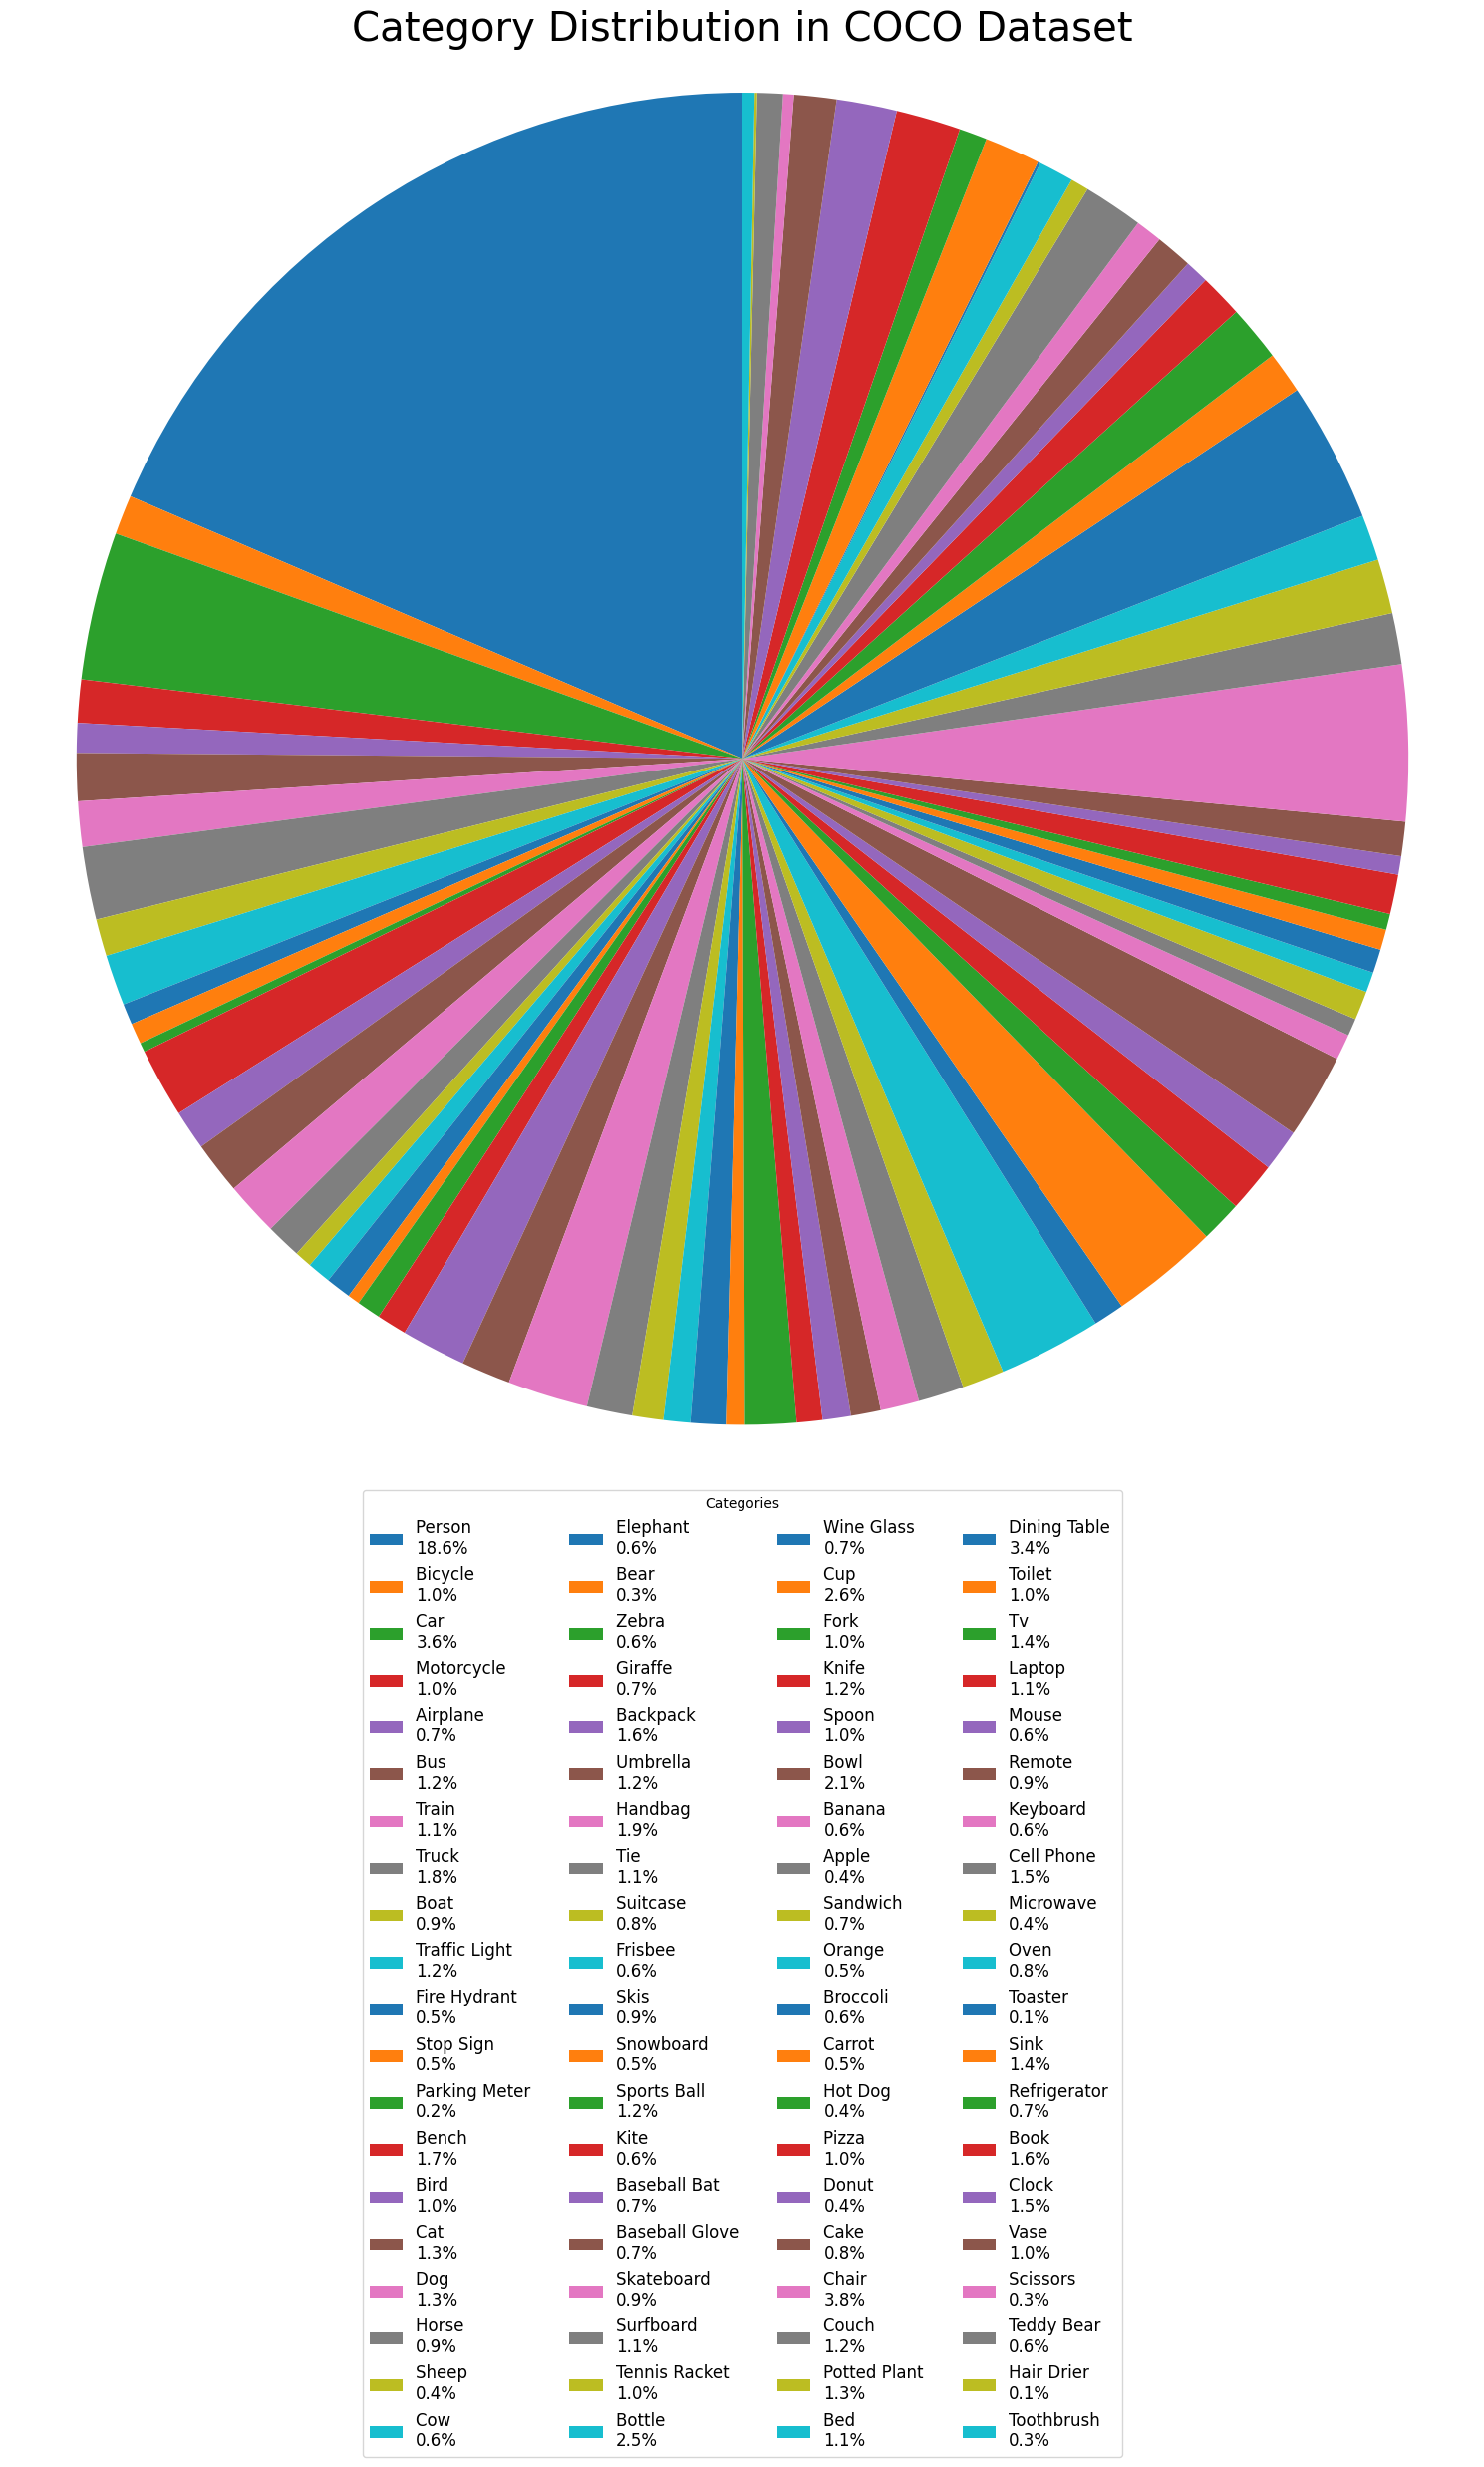

In [ ]:
# Calculate percentage for each category
total_count = sum(category_counts)
category_percentages = [(count / total_count) * 100 for count in category_counts]


# Create a pie chart to visualize the category distribution
plt.figure(figsize=(15, 24.9))


# Customize labels properties
labels = [f"{name} " for name, percentage in zip(category_names, category_percentages)]
label_props = {"fontsize": 25,
               "bbox": {"edgecolor": "white",
                        "facecolor": "white",
                        "alpha": 0.7,
                        "pad": 0.5}
              }

# Add percentage information to labels, and set labeldistance to remove labels from the pie
wedges, _, autotexts = plt.pie(category_counts,
                              autopct='',
                              startangle=90,
                              textprops=label_props,
                              pctdistance=0.85)

# Create the legend with percentages
legend_labels = [f"{label}\n{category_percentages[i]:.1f}%" for i, label in enumerate(labels)]
plt.legend(wedges, legend_labels, title="Categories", loc="upper center", bbox_to_anchor=(0.5, -0.01),
           ncol=4, fontsize=12)

plt.axis('equal')
plt.title('Category Distribution in COCO Dataset', fontsize=29)
plt.tight_layout()
plt.savefig('coco-dis.png', dpi=300)
plt.show()

**Step 14: Displaying Filtered Images with Annotations**



Displaying images from the COCO dataset that contain specific classes, and visualize their annotations.

Define the classes: Create a list called **filterClasses** containing the names of the classes you want to display.

Fetch category IDs: Use the **getCatIds()** method of the COCO API to retrieve the category IDs corresponding to the **filterClasses**

Get image IDs: Use the **getImgIds()** method of the COCO API to retrieve the image IDs that contain the desired category IDs

Load a random image: Check if there are images in the **imgIds** list. If so, randomly select an image ID using **np.random.randint()**. Load the image information using the **loadImgs()** method and store it in the **image_info** variable.

Load annotations: Get the annotation IDs for the selected image using the **getAnnIds()** method. Then, load the annotations using the **loadAnns()** method

Get category names and assign colors: Iterate over the annotations and use the **loadCats()** method to retrieve the category names based on the category IDs.

Load and display the image: Use **plt.imread()** to load the image using the **image_path** obtained from the image information. Display the image using **plt.imshow()**. Turn off the axis using **plt.axis('off')** and set the title of the plot using **plt.title()**

Display bounding boxes and segmentations: Iterate over the annotations and use the bounding box and segmentation information to draw bounding boxes and segmented regions on the image. Use **patches.Rectangle() **to create bounding box rectangles and **plt.fill() **to display segmentation masks.

Create a legend: Use **patches.Patch()** to create legend patches and **plt.legend()** to display the legend.

Display the image with the legend

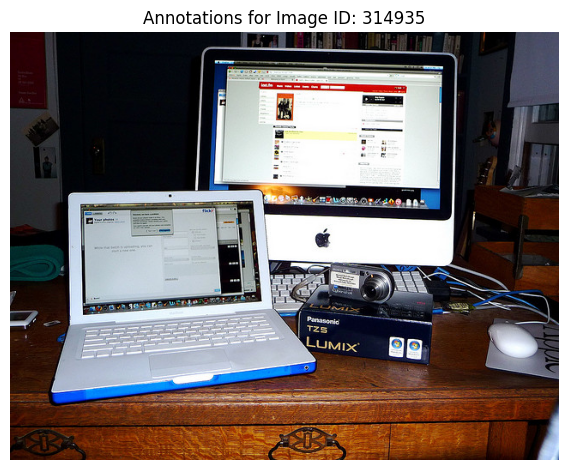

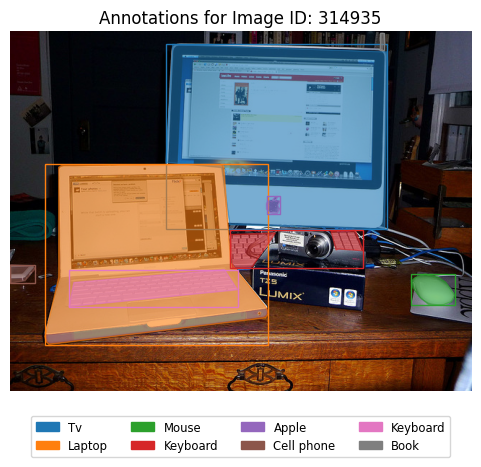

In [ ]:
# Define the classes (out of the 80) which you want to see. Others will not be shown.
filterClasses = ['laptop', 'tv', 'cell phone']

# Fetch class IDs only corresponding to the filterClasses
catIds = coco.getCatIds(catNms=filterClasses)

# Get all images containing the above Category IDs
imgIds = coco.getImgIds(catIds=catIds)

# Load a random image from the filtered list
if len(imgIds) > 0:
    image_id = imgIds[np.random.randint(len(imgIds))]  # Select a random image ID
    image_info = coco.loadImgs(image_id)

    if image_info is not None and len(image_info) > 0:
        image_info = image_info[0]
        image_path = imageDir + image_info['file_name']

        # Load the annotations for the image
        annotation_ids = coco.getAnnIds(imgIds=image_id)
        annotations = coco.loadAnns(annotation_ids)

        # Get category names and assign colors for annotations
        category_names = [coco.loadCats(ann['category_id'])[0]['name'].capitalize() for ann in annotations]
        category_colors = list(matplotlib.colors.TABLEAU_COLORS.values())

        # Load the image and plot it
        image = plt.imread(image_path)
        plt.imshow(image)
        plt.axis('off')
        plt.title('Annotations for Image ID: {}'.format(image_id))
        plt.tight_layout()
        plt.savefig('Img.png',dpi=350)
        plt.show()

        plt.imshow(image)
        plt.axis('off')

        # Display bounding boxes and segmented colors for each annotation
        for ann, color in zip(annotations, category_colors):
            bbox = ann['bbox']
            segmentation = ann['segmentation']

            # Display bounding box
            rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1,
                                     edgecolor=color, facecolor='none')
            plt.gca().add_patch(rect)

            # Display segmentation masks with assigned colors
            for seg in segmentation:
                poly = np.array(seg).reshape((len(seg) // 2, 2))
                plt.fill(poly[:, 0], poly[:, 1], color=color, alpha=0.6)

        # Create a legend with category names and colors
        legend_patches = [patches.Patch(color=color, label=name) for color, name in zip(category_colors, category_names)]
        plt.legend(handles=legend_patches, loc="lower center", ncol=4, bbox_to_anchor=(0.5, -0.2), fontsize='small')

        # Show the image with legend
        plt.title('Annotations for Image ID: {}'.format(image_id))
        plt.tight_layout()
        plt.savefig('annImg.png',dpi=350)
        plt.show()
    else:
        print("No image information found for the selected image ID.")
else:
    print("No images found for the desired classes.")

**Step 15: Generating Masks for Object Segmentation**



We present a systematic approach to extract mask information, generate binary masks, and employ post-processing techniques to enhance mask quality.

The COCO dataset offers three main types of masks:

**Polygon Annotations:**Polygon annotations consist of a series of points connected by straight lines that enclose an object.

**Instance Segmentation Masks:** Instance segmentation masks are binary or RGB masks that precisely indicate the boundaries separating different objects within an image.

**Object Detection Bounding Boxes:** Object detection bounding boxes define rectangular regions that enclose objects within an image.

In [ ]:
# Extracting Mask Information
# Load annotations for a specific image ID
# Load images for the given ids
image_ids = coco.getImgIds()
image_id = image_ids[0]
annotations = coco.loadAnns(coco.getAnnIds(imgIds=image_id))

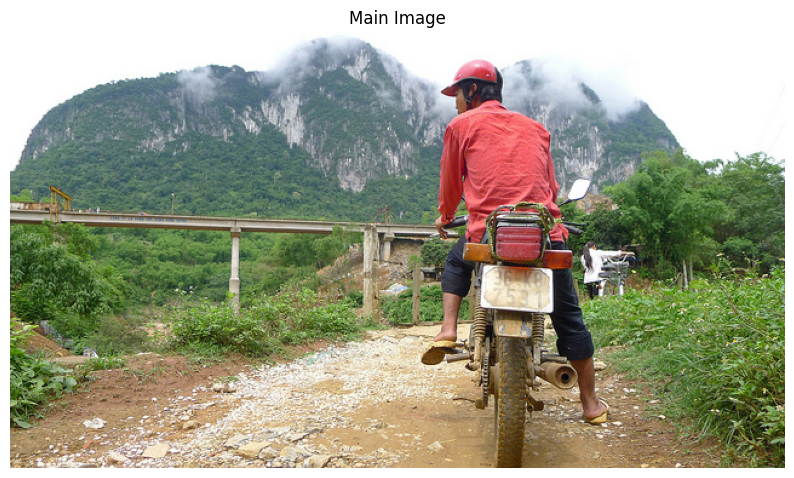

In [ ]:
# Retrieve image file path
image_info = coco.loadImgs(image_id)[0]
image_dir = os.path.join(dataDir, 'images', 'val2014')
image_path = os.path.join(image_dir, image_info['file_name'])

# Load the main image
main_image = plt.imread(image_path)

# Create a new figure for displaying the main image
plt.figure(figsize=(10, 10))
plt.imshow(main_image)
plt.axis('off')
plt.title('Main Image')

# Save the figures
plt.savefig('main_image.png', dpi=300)

# Show the plots
plt.show()


**Generating Binary Masks**

Binary masks serve as a fundamental representation for object segmentation tasks. Utilizing pixel values of 0 or 1, binary masks effectively denote object absence or presence within the mask.

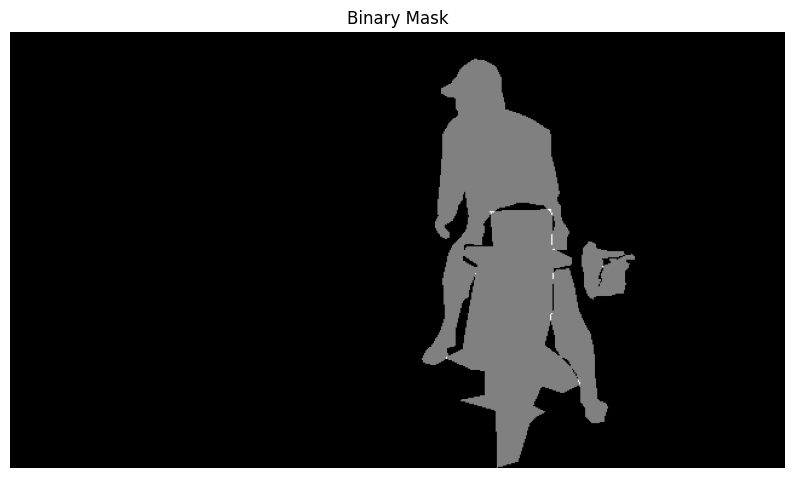

In [ ]:
# Retrieve image dimensions
image_info = coco.loadImgs(image_id)[0]
height, width = image_info['height'], image_info['width']

# Create an empty binary mask with the same dimensions as the image
binary_mask = np.zeros((height, width), dtype=np.uint8)

# Iterate through the annotations and draw the binary masks
for annotation in annotations:
    segmentation = annotation['segmentation']
    mask = coco.annToMask(annotation)

    # Add the mask to the binary mask
    binary_mask += mask

# Display the binary mask
plt.figure(figsize=(10,10))
plt.imshow(binary_mask, cmap='gray')
plt.axis('off')
plt.title('Binary Mask')
plt.savefig('binary_mask.png', dpi=300)
plt.show()


**Generating RGB Mask**

While binary masks provide a simplified representation, RGB[red, green, blue] masks offer a more nuanced understanding of object segmentation.

RGB masks utilize three color channels (red, green, and blue) to differentiate between different classes or objects within an image.

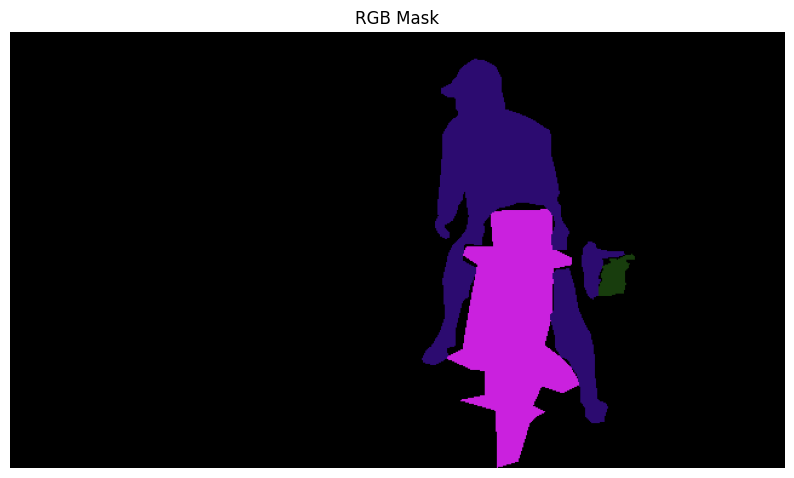

In [ ]:
# Retrieve image dimensions
image_info = coco.loadImgs(image_id)[0]
height, width = image_info['height'], image_info['width']

# Create an empty RGB mask with the same dimensions as the image
rgb_mask = np.zeros((height, width, 3), dtype=np.uint8)

# Define a color map for different object classes
color_map = {cat['id']: (np.random.randint(0, 256), np.random.randint(0, 256), np.random.randint(0, 256))
             for cat in coco.loadCats(catIDs)}

# Iterate through the annotations and assign unique colors to each class/object
for annotation in annotations:
    category_id = annotation['category_id']
    color = color_map[category_id]

    # Draw the mask on the RGB mask
    mask = coco.annToMask(annotation)
    rgb_mask[mask == 1] = color

# Display the RGB mask
plt.figure(figsize=(10,10))
plt.imshow(rgb_mask)
plt.axis('off')
plt.title('RGB Mask')
plt.savefig('rgb_mask.png', dpi=300)
plt.show()


**Generating Instance Segmentation Mask**

Instance segmentation masks offer a highly accurate representation of object boundaries and facilitate the separation of individual objects within an image.

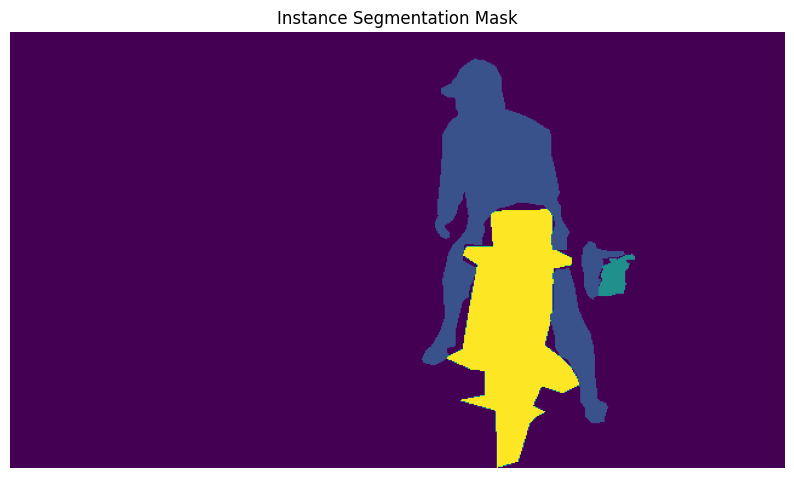

In [ ]:
# Retrieve image dimensions
image_info = coco.loadImgs(image_id)[0]
height, width = image_info['height'], image_info['width']

# Create an empty mask with the same dimensions as the image
instance_mask = np.zeros((height, width), dtype=np.uint8)

# Iterate through the annotations and draw the instance segmentation masks
for annotation in annotations:
    segmentation = annotation['segmentation']
    mask = coco.annToMask(annotation)
    category_id = annotation['category_id']

    # Assign a unique value to each instance mask
    instance_mask[mask == 1] = category_id

# Display the instance segmentation mask
plt.figure(figsize=(10,10))
plt.imshow(instance_mask, cmap='viridis')
plt.axis('off')
plt.title('Instance Segmentation Mask')
plt.savefig('instance_mask.png', dpi=300)
plt.show()


**Generating Object Detection Bounding Boxes**


Object detection bounding boxes provide information about the rectangular regions encompassing objects within an image. While they do not offer pixel-level segmentation, they provide a coarse representation of object locations.

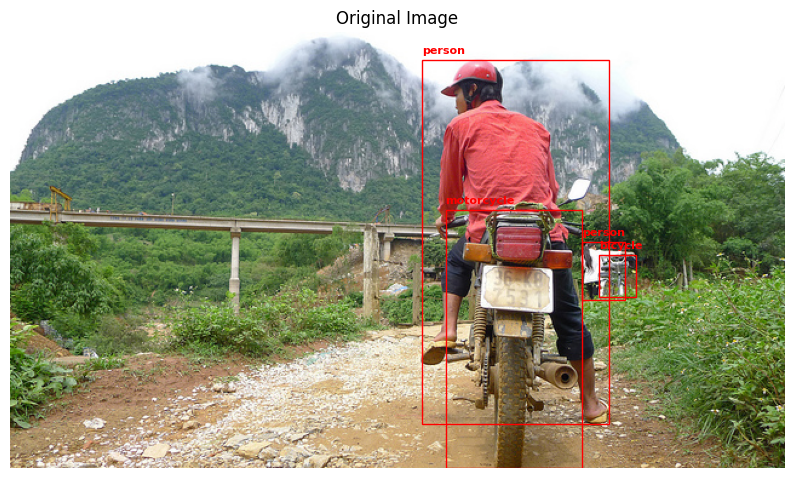

In [ ]:
# Retrieve image dimensions
image_info = coco.loadImgs(image_id)[0]
height, width = image_info['height'], image_info['width']

# Create a new figure with the same dimensions as the image
fig, ax = plt.subplots(figsize=(10,10), dpi=100)

# Display the original image
ax.imshow(main_image)
ax.axis('off')
ax.set_title('Original Image')

# Draw bounding boxes on the original image
for annotation in annotations:
    bbox = annotation['bbox']
    category_id = annotation['category_id']
    category_name = coco.loadCats(category_id)[0]['name']

    # Convert COCO bounding box format (x, y, width, height) to matplotlib format (xmin, ymin, xmax, ymax)
    xmin, ymin, width, height = bbox
    xmax = xmin + width
    ymax = ymin + height

    # Draw the bounding box rectangle
    rect = patches.Rectangle((xmin, ymin), width, height, linewidth=1, edgecolor='red', facecolor='none')
    ax.add_patch(rect)

    # Add the category name as a label above the bounding box
    ax.text(xmin, ymin - 5, category_name, fontsize=8, color='red', weight='bold')

# Save the figure with adjusted dimensions
plt.savefig('bounding_boxes.png', bbox_inches='tight')

# Show the plot
plt.show()


**Post-Processing Techniques**


Post-processing techniques play a pivotal role in refining mask quality and enhancing segmentation accuracy.

<ipython-input-26-9c43dd83e7b9>:3: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter


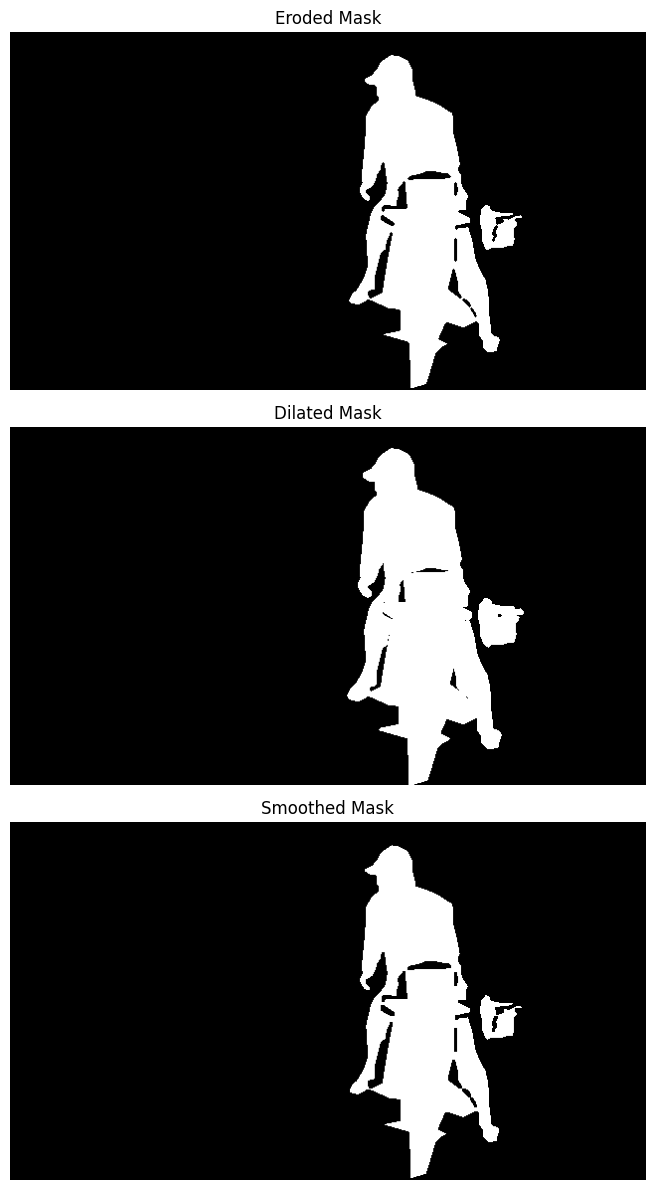

In [ ]:
import numpy as np
from scipy.ndimage import binary_erosion, binary_dilation
from scipy.ndimage.filters import gaussian_filter

# Apply erosion to the binary mask
eroded_mask = binary_erosion(binary_mask)

# Apply dilation to the binary mask
dilated_mask = binary_dilation(binary_mask)

# Apply Gaussian blur to the binary mask
smoothed_mask = gaussian_filter(binary_mask, sigma=.2)

# Display the post-processed masks
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

axes[0].imshow(eroded_mask, cmap='gray')
axes[0].set_title('Eroded Mask')
axes[0].axis('off')

axes[1].imshow(dilated_mask, cmap='gray')
axes[1].set_title('Dilated Mask')
axes[1].axis('off')

axes[2].imshow(smoothed_mask, cmap='gray')
axes[2].set_title('Smoothed Mask')
axes[2].axis('off')

plt.tight_layout()
plt.savefig('post_processed_masks.png', dpi=300)
plt.show()


**Evaluation of Generated Masks**

To evaluate the quality of generated mask we have used :

**Intersection over Union (IoU)** is a widely used evaluation metric for measuring the similarity between masks.

It calculates the ratio of the intersection area to the union area between the predicted mask and the ground truth mask.

The IoU score ranges from 0 to 1, with a higher value indicating better alignment between the masks.

A score of 1 indicates a perfect match, while a score of 0 suggests no overlap.

In [ ]:
import numpy as np

# Ground truth mask
gt_mask = binary_mask.astype(bool)  # Example ground truth mask

# Predicted mask
predicted_mask = smoothed_mask.astype(bool)  # Example predicted mask

# Calculate Intersection over Union (IoU)
intersection = np.logical_and(gt_mask, predicted_mask)
union = np.logical_or(gt_mask, predicted_mask)
iou = np.sum(intersection) / np.sum(union)

# Print the IoU score
print(f"Intersection over Union (IoU): {iou:.4f}")


Intersection over Union (IoU): 0.9161


**Visualization and Qualitative Assessment**

Evaluating the quality of generated masks is essential to assess the performance of object segmentation algorithms.

Utilizing appropriate evaluation metrics and conducting visual assessments can provide valuable insights for refining the models and improving the accuracy of the segmentation results.

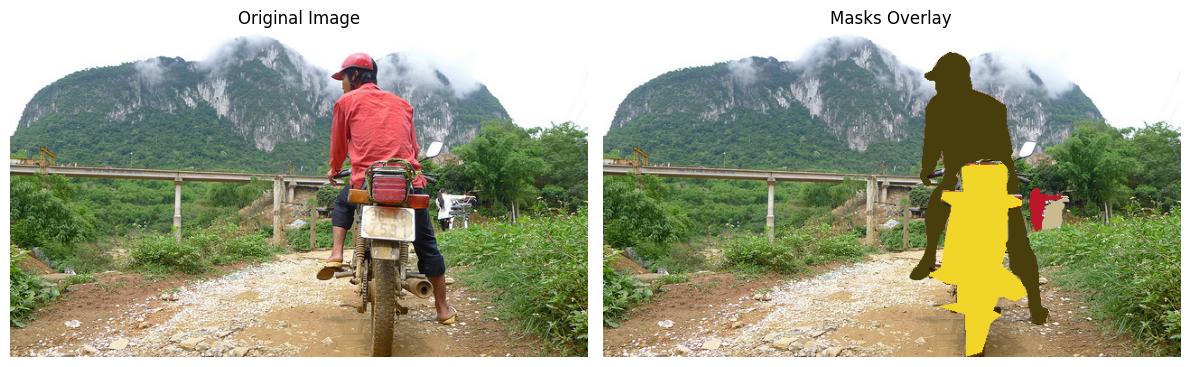

In [ ]:
# Select an image ID for visualization
image_id = image_ids[0]

# Load the image
image_info = coco.loadImgs(image_id)[0]
image_path = os.path.join(imageDir, image_info['file_name'])
image = plt.imread(image_path)

# Get the ground truth annotations for the image
annotation_ids = coco.getAnnIds(imgIds=image_id)
annotations = coco.loadAnns(annotation_ids)

# Create a blank image for overlaying the masks
overlay = image.copy()

# Iterate over the annotations and draw the masks on the overlay image
for annotation in annotations:
    # Get the segmentation mask
    mask = coco.annToMask(annotation)

    # Choose a random color for the mask
    color = np.random.randint(0, 256, size=(3,), dtype=np.uint8)

    # Apply the mask to the overlay image
    overlay[mask == 1] = color

# Create a figure and subplot for visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original image
ax1.imshow(image)
ax1.set_title('Original Image')
ax1.axis('off')

# Plot the image with overlay masks
ax2.imshow(overlay)
ax2.set_title('Masks Overlay')
ax2.axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Save the visualization as an image file
plt.savefig('mask_visualization.png', dpi=300)

# Show the plot
plt.show()


**Step 16: Generating Image and Mask Datasets**

the process of generating image and mask datasets using the COCO dataset.

**Upgrade the tensorflow-io to avoid errors.**

In [ ]:
!pip uninstall -y tensorflow-io
!pip install tensorflow-io

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 MB 9.9 MB/s eta 0:00:00


In [ ]:
from tensorflow import keras


# Load paths for the COCO dataset annotation files
ANNOTATION_FILE_TRAIN = '/kaggle/input/coco-2014-dataset-for-yolov3/coco2014/annotations/instances_train2014.json'
ANNOTATION_FILE_VAL = '/kaggle/input/coco-2014-dataset-for-yolov3/coco2014/annotations/instances_val2014.json'

# Define the object classes of interest
classes = ['person']

# Initialize COCO instances for training set and load relevant data
coco_train = COCO(ANNOTATION_FILE_TRAIN)
catIds_train = coco_train.getCatIds(catNms=classes)
imgIds_train = coco_train.getImgIds(catIds=catIds_train)
imgDict_train = coco_train.loadImgs(imgIds_train)

# Initialize COCO instances for validation set and load relevant data
coco_val = COCO(ANNOTATION_FILE_VAL)
catIds_val = coco_val.getCatIds(catNms=classes)
imgIds_val = coco_val.getImgIds(catIds=catIds_val)
imgDict_val = coco_val.loadImgs(imgIds_val)

# Print the number of training and validation images and categories
print(len(imgIds_train), len(catIds_train))
print(len(imgIds_val), len(catIds_val))

# Shuffle the training and validation image IDs
shuffle(imgIds_train)
shuffle(imgIds_val)

# Select a subset of validation image IDs
imgIds_val = imgIds_val[0:600]
imgIds_train = imgIds_train[0:6000]
# Generate the list of file names for training and validation person images
train_images_person = ["COCO_train2014_{0:012d}.jpg".format(ids) for ids in imgIds_train]
val_images_person = ["COCO_val2014_{0:012d}.jpg".format(ids) for ids in imgIds_val]

# Print the number of training and validation person images
print(len(train_images_person), len(val_images_person))

# Generate the list of file names for training person images
train_images_person = ["COCO_train2014_{0:012d}.jpg".format(ids) for ids in imgIds_train]

# Generate the list of file names for validation person images
val_images_person = ["COCO_val2014_{0:012d}.jpg".format(ids) for ids in imgIds_val]

# Check the number of files in the validation images directory
len(os.listdir("/kaggle/input/coco-2014-dataset-for-yolov3/coco2014/images/val2014"))

# Create a directory to store the generated training masks
!mkdir mask_train_2014

# Initialize a count variable
count = 0

# Generate the masks for training images
for ID in imgIds_train:

    # Set the file path for the mask
    file_path = "/kaggle/working/mask_train_2014/COCO_train2014_{0:012d}.jpg".format(ID)

    # Retrieve a random image ID from the training set
    sampleImgIds = coco_train.getImgIds(imgIds=[ID])
    sampleImgDict = coco_train.loadImgs(sampleImgIds[np.random.randint(0, len(sampleImgIds))])[0]

    # Retrieve the annotation IDs and annotations for the image
    annIds = coco_train.getAnnIds(imgIds=sampleImgDict['id'], catIds=catIds_train, iscrowd=0)
    anns = coco_train.loadAnns(annIds)

    # Generate the mask by combining the individual instance masks
    mask = coco_train.annToMask(anns[0])
    for i in range(len(anns)):
        mask = mask | coco_train.annToMask(anns[i])

    # Convert the mask to an image and save it
    mask = Image.fromarray(mask * 255, mode="L")
    mask.save(file_path)
    count = count + 1

# Create a directory to store the generated validation masks
!mkdir mask_val_2014

# Reset the count variable
count = 0

# Generate the masks for validation images
for ID in imgIds_val:

    # Set the file path for the mask
    file_path = "/kaggle/working/mask_val_2014/COCO_val2014_{0:012d}.jpg".format(ID)

    # Retrieve a random image ID from the validation set
    sampleImgIds = coco_val.getImgIds(imgIds=[ID])
    sampleImgDict = coco_val.loadImgs(sampleImgIds[np.random.randint(0, len(sampleImgIds))])[0]

    # Retrieve the annotation IDs and annotations for the image
    annIds = coco_val.getAnnIds(imgIds=sampleImgDict['id'], catIds=catIds_val, iscrowd=0)
    anns = coco_val.loadAnns(annIds)

    # Generate the mask by combining the individual instance masks
    mask = coco_val.annToMask(anns[0])
    for i in range(len(anns)):
        mask = mask | coco_val.annToMask(anns[i])

    # Convert the mask to an image and save it
    mask = Image.fromarray(mask * 255, mode="L")
    mask.save(file_path)

    count = count + 1




class CustomDataGenerator(keras.utils.Sequence):
    def __init__(self, images_path, masks_path, batch_size):
        """
        CustomDataGenerator class for generating batches of preprocessed images and masks.

        Args:
            images_path (str): Path to the directory containing the original images.
            masks_path (str): Path to the directory containing the corresponding masks.
            batch_size (int): Number of samples in each batch.

        Attributes:
            images_path (str): Path to the directory containing the original images.
            masks_path (str): Path to the directory containing the corresponding masks.
            batch_size (int): Number of samples in each batch.
            image_filenames (list): List of matching filenames between images and masks.
            mask_filenames (list): List of matching filenames between masks and images.
        """
        self.images_path = images_path
        self.masks_path = masks_path
        self.batch_size = batch_size
        self.image_filenames = self.get_matching_filenames()
        self.mask_filenames = self.get_matching_filenames()

    def get_matching_filenames(self):
        """
        Get the list of matching filenames between images and masks.

        Returns:
            list: List of matching filenames.
        """
        image_files = set([os.path.splitext(filename)[0] for filename in os.listdir(self.images_path)])
        mask_files = set([os.path.splitext(filename)[0] for filename in os.listdir(self.masks_path)])
        matching_files = list(image_files.intersection(mask_files))
        return matching_files

    def __len__(self):
        """
        Get the number of batches in the generator.

        Returns:
            int: Number of batches.
        """
        return int(np.ceil(len(self.image_filenames) / self.batch_size))

    def __getitem__(self, idx):
        """
        Get a batch of preprocessed images and masks.

        Args:
            idx (int): Batch index.

        Returns:
            tuple: Batch of preprocessed images and masks.
        """
        batch_filenames = self.image_filenames[idx * self.batch_size:(idx + 1) * self.batch_size]

        batch_images = []
        batch_masks = []

        for filename in batch_filenames:
            image_path = os.path.join(self.images_path, filename + '.jpg')
            mask_path = os.path.join(self.masks_path, filename + '.jpg')

            image = Image.open(image_path)
            mask = Image.open(mask_path)

            # Check if image and mask have the same dimensions
            if image.size != mask.size:
                raise ValueError(f"Incompatible dimensions for image {image_path} and mask {mask_path}")

            # Resize the images and masks to size 128x128
            image = image.resize((128, 128))
            mask = mask.resize((128, 128))

            # Convert the images and masks to arrays
            preprocessed_image = np.array(image)
            preprocessed_mask = np.array(mask)

            # Check if image has 3 channels and shape of (128, 128, 3)
            if len(preprocessed_image.shape) == 3 and preprocessed_image.shape == (128, 128, 3):
                # Normalize the pixel values if needed
                preprocessed_image = preprocessed_image / 255.0
                preprocessed_mask = preprocessed_mask / 255.0

                # Append the preprocessed images and masks to the batch
                batch_images.append(preprocessed_image)
                batch_masks.append(preprocessed_mask)

        # Convert the batch images and masks to numpy arrays and return
        return np.array(batch_images), np.array(batch_masks)


# Usage
images_path = '/kaggle/input/coco-2014-dataset-for-yolov3/coco2014/images/train2014'
masks_path = '/kaggle/working/mask_train_2014'
batch_size = 8

# Create an instance of the CustomDataGenerator
train_generator = CustomDataGenerator(images_path, masks_path, batch_size)


loading annotations into memory...
Done (t=14.30s)
creating index...
index created!
loading annotations into memory...
Done (t=7.56s)
creating index...
index created!
45174 1
21634 1
6000 600
mkdir: cannot create directory ‘mask_train_2014’: File exists


In [ ]:
from tensorflow import keras
from pycocotools.coco import COCO
from PIL import Image
import os
import numpy as np
from random import shuffle

# Load paths for the COCO dataset annotation files
ANNOTATION_FILE_TRAIN = '/kaggle/input/coco-2014-dataset-for-yolov3/coco2014/annotations/instances_train2014.json'
ANNOTATION_FILE_VAL = '/kaggle/input/coco-2014-dataset-for-yolov3/coco2014/annotations/instances_val2014.json'

# Define the object classes of interest
classes = ['person']

# Initialize COCO instances for training set and load relevant data
coco_train = COCO(ANNOTATION_FILE_TRAIN)
catIds_train = coco_train.getCatIds(catNms=classes)
imgIds_train = coco_train.getImgIds(catIds=catIds_train)
imgDict_train = coco_train.loadImgs(imgIds_train)

# Initialize COCO instances for validation set and load relevant data
coco_val = COCO(ANNOTATION_FILE_VAL)
catIds_val = coco_val.getCatIds(catNms=classes)
imgIds_val = coco_val.getImgIds(catIds=catIds_val)
imgDict_val = coco_val.loadImgs(imgIds_val)

# Print the number of training and validation images and categories
print(len(imgIds_train), len(catIds_train))
print(len(imgIds_val), len(catIds_val))

# Shuffle the training and validation image IDs
shuffle(imgIds_train)
shuffle(imgIds_val)

# Select a subset of validation image IDs
imgIds_val = imgIds_val[0:600]
imgIds_train = imgIds_train[0:6000]
# Generate the list of file names for training and validation person images
train_images_person = ["COCO_train2014_{0:012d}.jpg".format(ids) for ids in imgIds_train]
val_images_person = ["COCO_val2014_{0:012d}.jpg".format(ids) for ids in imgIds_val]

# Print the number of training and validation person images
print(len(train_images_person), len(val_images_person))

# Generate the list of file names for training person images
train_images_person = ["COCO_train2014_{0:012d}.jpg".format(ids) for ids in imgIds_train]

# Generate the list of file names for validation person images
val_images_person = ["COCO_val2014_{0:012d}.jpg".format(ids) for ids in imgIds_val]

# Check the number of files in the validation images directory
len(os.listdir("/kaggle/input/coco-2014-dataset-for-yolov3/coco2014/images/val2014"))

# Create a directory to store the generated training masks if it doesn't exist
mask_train_dir = "/kaggle/working/mask_train_2014"
if not os.path.exists(mask_train_dir):
    os.mkdir(mask_train_dir)

# Initialize a count variable
count = 0

# Generate the masks for training images
for ID in imgIds_train:
    # Set the file path for the mask
    file_path = os.path.join(mask_train_dir, "COCO_train2014_{0:012d}.jpg".format(ID))

    # Retrieve a random image ID from the training set
    sampleImgIds = coco_train.getImgIds(imgIds=[ID])
    sampleImgDict = coco_train.loadImgs(sampleImgIds[np.random.randint(0, len(sampleImgIds))])[0]

    # Retrieve the annotation IDs and annotations for the image
    annIds = coco_train.getAnnIds(imgIds=sampleImgDict['id'], catIds=catIds_train, iscrowd=0)
    anns = coco_train.loadAnns(annIds)

    # Generate the mask by combining the individual instance masks
    mask = coco_train.annToMask(anns[0])
    for i in range(len(anns)):
        mask = mask | coco_train.annToMask(anns[i])

    # Convert the mask to an image and save it
    mask = Image.fromarray(mask * 255, mode="L")
    mask.save(file_path)
    count = count + 1

# Create a directory to store the generated validation masks if it doesn't exist
mask_val_dir = "/kaggle/working/mask_val_2014"
if not os.path.exists(mask_val_dir):
    os.mkdir(mask_val_dir)

# Reset the count variable
count = 0

# Generate the masks for validation images
for ID in imgIds_val:
    # Set the file path for the mask
    file_path = os.path.join(mask_val_dir, "COCO_val2014_{0:012d}.jpg".format(ID))

    # Retrieve a random image ID from the validation set
    sampleImgIds = coco_val.getImgIds(imgIds=[ID])
    sampleImgDict = coco_val.loadImgs(sampleImgIds[np.random.randint(0, len(sampleImgIds))])[0]

    # Retrieve the annotation IDs and annotations for the image
    annIds = coco_val.getAnnIds(imgIds=sampleImgDict['id'], catIds=catIds_val, iscrowd=0)
    anns = coco_val.loadAnns(annIds)

    # Generate the mask by combining the individual instance masks
    mask = coco_val.annToMask(anns[0])
    for i in range(len(anns)):
        mask = mask | coco_val.annToMask(anns[i])

    # Convert the mask to an image and save it
    mask = Image.fromarray(mask * 255, mode="L")
    mask.save(file_path)

    count = count + 1

class CustomDataGenerator(keras.utils.Sequence):
    def __init__(self, images_path, masks_path, batch_size):
        """
        CustomDataGenerator class for generating batches of preprocessed images and masks.

        Args:
            images_path (str): Path to the directory containing the original images.
            masks_path (str): Path to the directory containing the corresponding masks.
            batch_size (int): Number of samples in each batch.

        Attributes:
            images_path (str): Path to the directory containing the original images.
            masks_path (str): Path to the directory containing the corresponding masks.
            batch_size (int): Number of samples in each batch.
            image_filenames (list): List of matching filenames between images and masks.
            mask_filenames (list): List of matching filenames between masks and images.
        """
        self.images_path = images_path
        self.masks_path = masks_path
        self.batch_size = batch_size
        self.image_filenames = self.get_matching_filenames()
        self.mask_filenames = self.get_matching_filenames()

    def get_matching_filenames(self):
        """
        Get the list of matching filenames between images and masks.

        Returns:
            list: List of matching filenames.
        """
        image_files = set([os.path.splitext(filename)[0] for filename in os.listdir(self.images_path)])
        mask_files = set([os.path.splitext(filename)[0] for filename in os.listdir(self.masks_path)])
        matching_files = list(image_files.intersection(mask_files))
        return matching_files

    def __len__(self):
        """
        Get the number of batches in the generator.

        Returns:
            int: Number of batches.
        """
        return int(np.ceil(len(self.image_filenames) / self.batch_size))

    def __getitem__(self, idx):
        """
        Get a batch of preprocessed images and masks.

        Args:
            idx (int): Batch index.

        Returns:
            tuple: Batch of preprocessed images and masks.
        """
        batch_filenames = self.image_filenames[idx * self.batch_size:(idx + 1) * self.batch_size]

        batch_images = []
        batch_masks = []

        for filename in batch_filenames:
            image_path = os.path.join(self.images_path, filename + '.jpg')
            mask_path = os.path.join(self.masks_path, filename + '.jpg')

            image = Image.open(image_path)
            mask = Image.open(mask_path)

            # Check if image and mask have the same dimensions
            if image.size != mask.size:
                raise ValueError(f"Incompatible dimensions for image {image_path} and mask {mask_path}")

            # Resize the images and masks to size 128x128
            image = image.resize((128, 128))
            mask = mask.resize((128, 128))

            # Convert the images and masks to arrays
            preprocessed_image = np.array(image)
            preprocessed_mask = np.array(mask)

            # Check if image has 3 channels and shape of (128, 128, 3)
            if len(preprocessed_image.shape) == 3 and preprocessed_image.shape == (128, 128, 3):
                # Normalize the pixel values if needed
                preprocessed_image = preprocessed_image / 255.0
                preprocessed_mask = preprocessed_mask / 255.0

                # Append the preprocessed images and masks to the batch
                batch_images.append(preprocessed_image)
                batch_masks.append(preprocessed_mask)

        # Convert the batch images and masks to numpy arrays and return
        return np.array(batch_images), np.array(batch_masks)

# Usage
images_path = '/kaggle/input/coco-2014-dataset-for-yolov3/coco2014/images/train2014'
masks_path = '/kaggle/working/mask_train_2014'
batch_size = 8

# Create an instance of the CustomDataGenerator
train_generator = CustomDataGenerator(images_path, masks_path, batch_size)


loading annotations into memory...
Done (t=21.72s)
creating index...
index created!
loading annotations into memory...
Done (t=6.09s)
creating index...
index created!
45174 1
21634 1
6000 600


In [ ]:
def validate_image_shapes(generator):
    """
    Print the shapes of preprocessed images generated by the provided generator.

    Args:
        generator (CustomDataGenerator): Instance of the CustomDataGenerator class.
    """
    for i in range(len(generator)):
        # Get a batch of preprocessed images from the generator
        batch_images, _ = generator[i]

        # Print the shapes of the preprocessed images
        for image in batch_images:
            print(f"Shape of preprocessed image: {image.shape}")

validate_image_shapes(train_generator)


Streaming output truncated to the last 5000 lines.
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Sha

In [ ]:
# Print the number of files in the train2014 directory containing original images
print(len(os.listdir("/kaggle/input/coco-2014-dataset-for-yolov3/coco2014/images/train2014")))

# Print the number of files in the mask_train_2014 directory containing generated masks
print(len(os.listdir("/kaggle/working/mask_train_2014")))

# Print the number of files in the val2014 directory containing original images
print(len(os.listdir("/kaggle/input/coco-2014-dataset-for-yolov3/coco2014/images/val2014")))

# Print the number of files in the mask_val_2014 directory containing generated masks
print(len(os.listdir("/kaggle/working/mask_val_2014")))


82783
11135
40458
1185


**To test the generated masks and images, we can use the following code:**

Mask Image Shape: (486, 640)
Main Image Shape: (486, 640, 3)


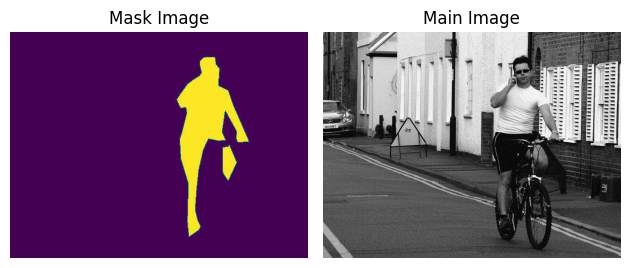

In [ ]:
# Get the list of mask filenames
mask_filenames = [filename for filename in os.listdir(masks_path) if filename.endswith('.jpg')]

# Assuming the first image in the mask folder is the one to plot
first_mask_filename = mask_filenames[0]
image_filename = os.path.splitext(first_mask_filename)[0] + '.jpg'

# Load and plot the mask image
mask_image = Image.open(os.path.join(masks_path, first_mask_filename))
plt.subplot(1, 2, 1)
plt.imshow(mask_image)
plt.title('Mask Image')
plt.axis('off')

# Load and plot the corresponding main image
main_image = Image.open(os.path.join(images_path, image_filename))
plt.subplot(1, 2, 2)
plt.imshow(main_image)
plt.title('Main Image')
plt.axis('off')

# Print the shapes of the images
print('Mask Image Shape:', np.array(mask_image).shape)
print('Main Image Shape:', np.array(main_image).shape)

plt.tight_layout()
plt.show()


**Step 17: Training a U-Net Model for Image Segmentation**





Utilizing the dataset generator to train a deep learning model for image segmentation. The model architecture we will use is U-Net, which has proven to be effective for image segmentation tasks.

**U-Net Model**

The U-Net model consists of an encoder and a decoder.

The encoder part captures the contextual information and extracts features from the input image, while the decoder part reconstructs the segmented output by performing upsampling and incorporating skip connections.

The U-Net architecture has several convolutional layers with batch normalization and max pooling to extract features.



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
import keras
from keras.layers import *
from keras.optimizers import *

def down_block(
    input_tensor,
    no_filters,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding="same",
    kernel_initializer="he_normal",
    max_pool_window=(2, 2),
    max_pool_stride=(2, 2)
):
    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(input_tensor)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)

    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)

    conv = BatchNormalization(scale=True)(conv)

    # conv for skip connection
    conv = Activation("relu")(conv)

    pool = MaxPooling2D(pool_size=max_pool_window, strides=max_pool_stride)(conv)

    return conv, pool

def bottle_neck(
    input_tensor,
    no_filters,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding="same",
    kernel_initializer="he_normal"
):
    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(input_tensor)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)

    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)

    return conv

def up_block(
    input_tensor,
    no_filters,
    skip_connection,
    kernel_size=(3, 3),
    strides=(1, 1),
    upsampling_factor = (2,2),
    max_pool_window = (2,2),
    padding="same",
    kernel_initializer="he_normal"):


    conv = Conv2D(
        filters = no_filters,
        kernel_size= max_pool_window,
        strides = strides,
        activation = None,
        padding = padding,
        kernel_initializer=kernel_initializer
    )(UpSampling2D(size = upsampling_factor)(input_tensor))

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)


    conv = concatenate( [skip_connection , conv]  , axis = -1)


    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)

    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)

    return conv


def output_block(input_tensor,
    padding="same",
    kernel_initializer="he_normal"
):

    conv = Conv2D(
        filters=2,
        kernel_size=(3,3),
        strides=(1,1),
        activation="relu",
        padding=padding,
        kernel_initializer=kernel_initializer
    )(input_tensor)


    conv = Conv2D(
        filters=1,
        kernel_size=(1,1),
        strides=(1,1),
        activation="sigmoid",
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)


    return conv


def UNet(input_shape = (128,128,3)):

    filter_size = [64,128,256,512,1024]

    inputs = Input(shape = input_shape)

    d1 , p1 = down_block(input_tensor= inputs,
                         no_filters=filter_size[0],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal",
                         max_pool_window=(2,2),
                         max_pool_stride=(2,2))


    d2 , p2 = down_block(input_tensor= p1,
                         no_filters=filter_size[1],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal",
                         max_pool_window=(2,2),
                         max_pool_stride=(2,2))



    d3 , p3 = down_block(input_tensor= p2,
                         no_filters=filter_size[2],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal",
                         max_pool_window=(2,2),
                         max_pool_stride=(2,2))



    d4 , p4 = down_block(input_tensor= p3,
                         no_filters=filter_size[3],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal",
                         max_pool_window=(2,2),
                         max_pool_stride=(2,2))


    b = bottle_neck(input_tensor= p4,
                         no_filters=filter_size[4],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal")



    u4 = up_block(input_tensor = b,
                  no_filters = filter_size[3],
                  skip_connection = d4,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor = (2,2),
                  max_pool_window = (2,2),
                  padding="same",
                  kernel_initializer="he_normal")

    u3 = up_block(input_tensor = u4,
                  no_filters = filter_size[2],
                  skip_connection = d3,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor = (2,2),
                  max_pool_window = (2,2),
                  padding="same",
                  kernel_initializer="he_normal")


    u2 = up_block(input_tensor = u3,
                  no_filters = filter_size[1],
                  skip_connection = d2,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor = (2,2),
                  max_pool_window = (2,2),
                  padding="same",
                  kernel_initializer="he_normal")


    u1 = up_block(input_tensor = u2,
                  no_filters = filter_size[0],
                  skip_connection = d1,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor = (2,2),
                  max_pool_window = (2,2),
                  padding="same",
                  kernel_initializer="he_normal")



    output = output_block(input_tensor=u1 ,
                         padding = "same",
                         kernel_initializer= "he_normal")

    model = keras.models.Model(inputs = inputs , outputs = output)


    return model

model = UNet(input_shape = (128,128,3))
model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])

**Also, we can plot the model by using the below code**

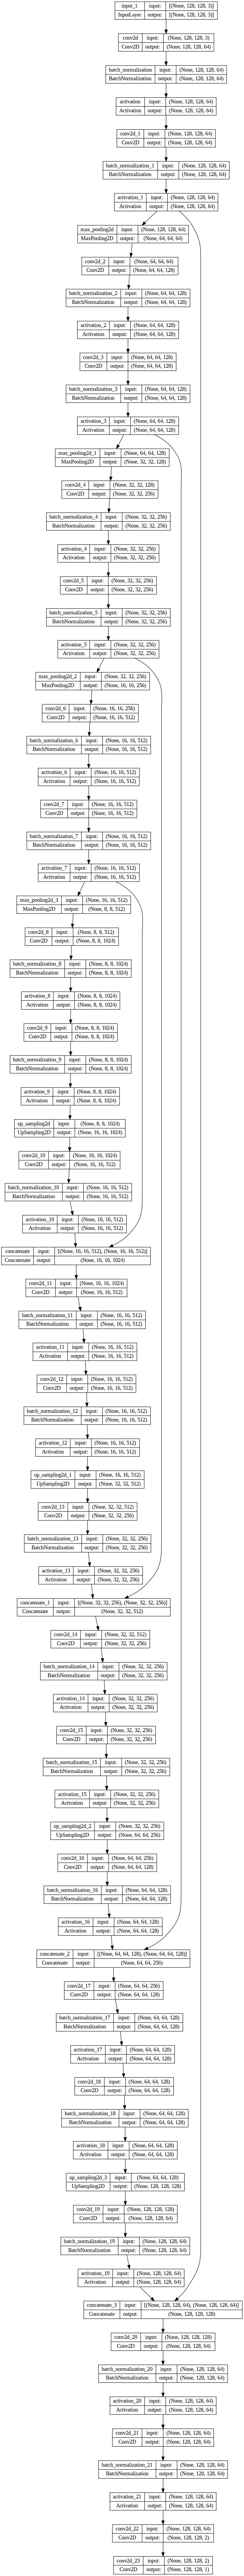

In [ ]:
from tensorflow.keras.utils import plot_model

# Visualize the model
plot_model(model, to_file='unet_model.png', show_shapes=True, show_layer_names=True)


**Now, we train the model**

In [ ]:
images_path = '/kaggle/input/coco-2014-dataset-for-yolov3/coco2014/images/val2014'
masks_path = '/kaggle/working/mask_val_2014'
batch_size = 8

val_generator = CustomDataGenerator(images_path, masks_path, batch_size)


In [ ]:
def print_preprocessed_image_shapes(model, generator):
    """
    Print the shapes of preprocessed images generated by the provided model and generator.

    Args:
        model (tf.keras.Model): The trained model.
        generator (CustomDataGenerator): Instance of the CustomDataGenerator class.
    """
    for i in range(len(generator)):
        # Get a batch of preprocessed images from the generator
        batch_images, batch_mask = generator[i]

        # Pass the batch of images through the model to obtain predictions
        # predictions = model.predict(batch_images)

        # Print the shapes of the preprocessed images
        for image in batch_images:
            print(f"Shape of preprocessed image: {image.shape}")


# Print the shapes of preprocessed images
print_preprocessed_image_shapes(model, val_generator)



#import os
#os.environ['TF_DISABLE_MODEL_OPTIMIZATIONS'] = '1'
#!pip install --upgrade tensorflow


Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of pr

In [ ]:
import sys

print("Python version:", sys.version)


Python version: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


In [ ]:
# Fit the model with the training generator

train_steps =  len(os.listdir( "/kaggle/working/mask_train_2014/"))/batch_size
model.fit(train_generator,validation_data = val_generator, steps_per_epoch = train_steps , epochs=20)


Epoch 1/20
1391/1391 [==============================] - 328s 212ms/step - loss: 0.3358 - accuracy: 0.8238 - val_loss: 0.2876 - val_accuracy: 0.8541
Epoch 2/20
1391/1391 [==============================] - 272s 195ms/step - loss: 0.2956 - accuracy: 0.8477 - val_loss: 0.2719 - val_accuracy: 0.8657
Epoch 3/20
1391/1391 [==============================] - 270s 194ms/step - loss: 0.2718 - accuracy: 0.8591 - val_loss: 0.2714 - val_accuracy: 0.8535
Epoch 4/20
1391/1391 [==============================] - 269s 193ms/step - loss: 0.2513 - accuracy: 0.8690 - val_loss: 0.2539 - val_accuracy: 0.8664
Epoch 5/20
1391/1391 [==============================] - 270s 194ms/step - loss: 0.2317 - accuracy: 0.8778 - val_loss: 0.2219 - val_accuracy: 0.8863
Epoch 6/20
1391/1391 [==============================] - 270s 194ms/step - loss: 0.2156 - accuracy: 0.8845 - val_loss: 0.2014 - val_accuracy: 0.8917
Epoch 7/20
1391/1391 [==============================] - 270s 194ms/step - loss: 0.1997 - accuracy: 0.8917 - val_

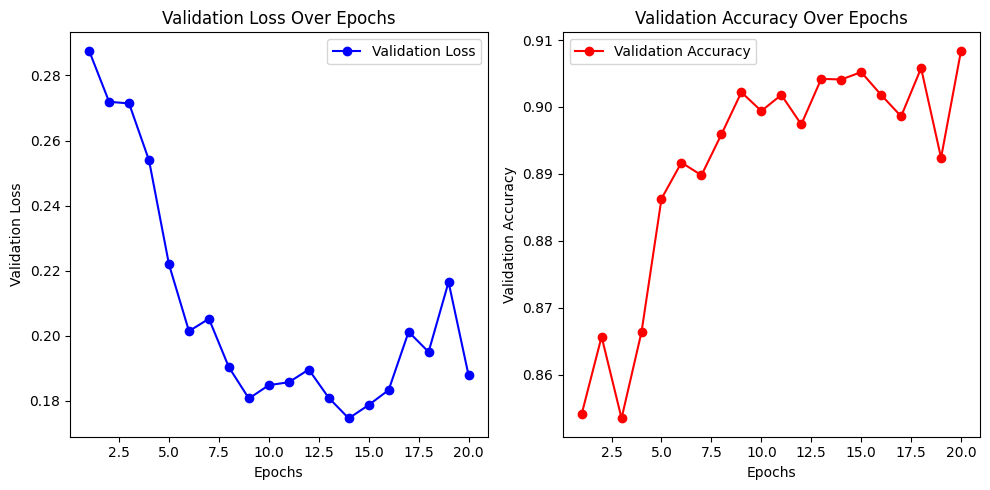

In [ ]:
import matplotlib.pyplot as plt

# Your data
epochs = range(1, 21)  # Assuming you have 20 epochs based on the provided data

# Loss values
val_loss = [0.2876, 0.2719, 0.2714, 0.2539, 0.2219, 0.2014, 0.2052, 0.1903, 0.1807, 0.1848, 0.1857, 0.1896, 0.1809, 0.1746, 0.1787, 0.1833, 0.2012, 0.1950, 0.2165, 0.1879]

# Accuracy values
val_accuracy = [0.8541, 0.8657, 0.8535, 0.8664, 0.8863, 0.8917, 0.8898, 0.8959, 0.9022, 0.8994, 0.9018, 0.8974, 0.9042, 0.9041, 0.9052, 0.9018, 0.8986, 0.9058, 0.8924, 0.9084]

# Plotting validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, val_loss, label='Validation Loss', marker='o', linestyle='-', color='b')
plt.title('Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

# Plotting validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o', linestyle='-', color='r')
plt.title('Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()


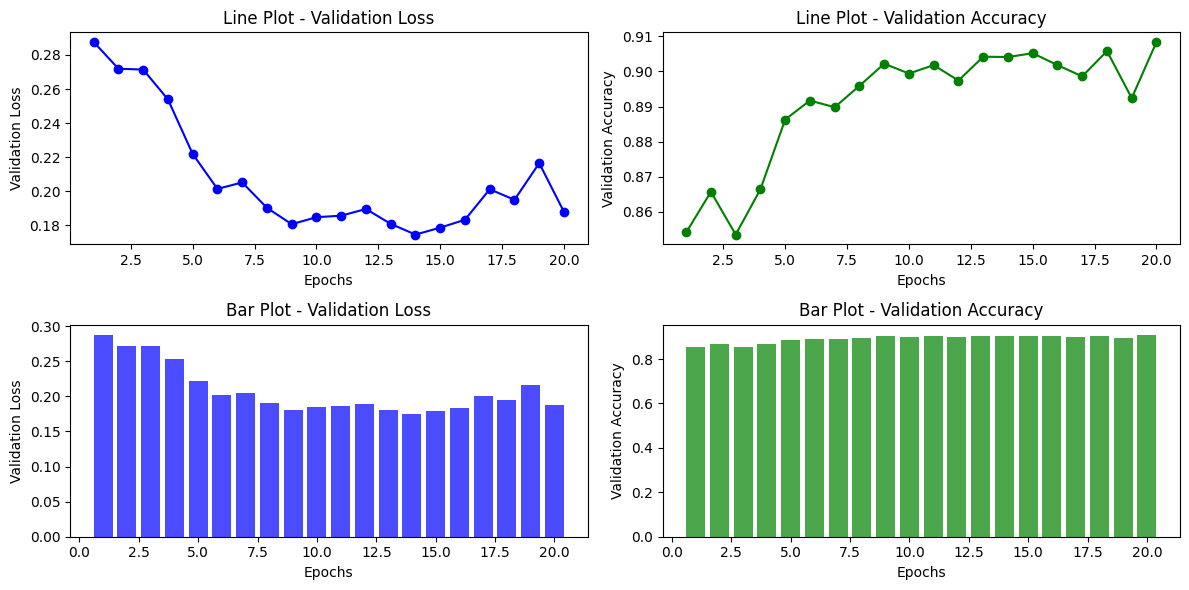

In [ ]:
import matplotlib.pyplot as plt

# Your data
epochs = range(1, 21)

# Validation Loss values
val_loss = [0.2876, 0.2719, 0.2714, 0.2539, 0.2219, 0.2014, 0.2052, 0.1903, 0.1807, 0.1848, 0.1857, 0.1896, 0.1809, 0.1746, 0.1787, 0.1833, 0.2012, 0.1950, 0.2165, 0.1879]

# Validation Accuracy values
val_accuracy = [0.8541, 0.8657, 0.8535, 0.8664, 0.8863, 0.8917, 0.8898, 0.8959, 0.9022, 0.8994, 0.9018, 0.8974, 0.9042, 0.9041, 0.9052, 0.9018, 0.8986, 0.9058, 0.8924, 0.9084]

# Line plot for validation loss
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(epochs, val_loss, marker='o', linestyle='-', color='blue')
plt.title('Line Plot - Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')

# Line plot for validation accuracy
plt.subplot(2, 2, 2)
plt.plot(epochs, val_accuracy, marker='o', linestyle='-', color='green')
plt.title('Line Plot - Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')

# Bar plot for validation loss
plt.subplot(2, 2, 3)
plt.bar(epochs, val_loss, color='blue', alpha=0.7)
plt.title('Bar Plot - Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')

# Bar plot for validation accuracy
plt.subplot(2, 2, 4)
plt.bar(epochs, val_accuracy, color='green', alpha=0.7)
plt.title('Bar Plot - Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


In [ ]:
# save the model
model.save(dataDir+'/img_caption_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Step 18: Predicting and Visualizing Segmentation Masks**

Trained U-Net model to predict segmentation masks for a sample batch of validation data.

1/1 [==============================] - 1s 502ms/step


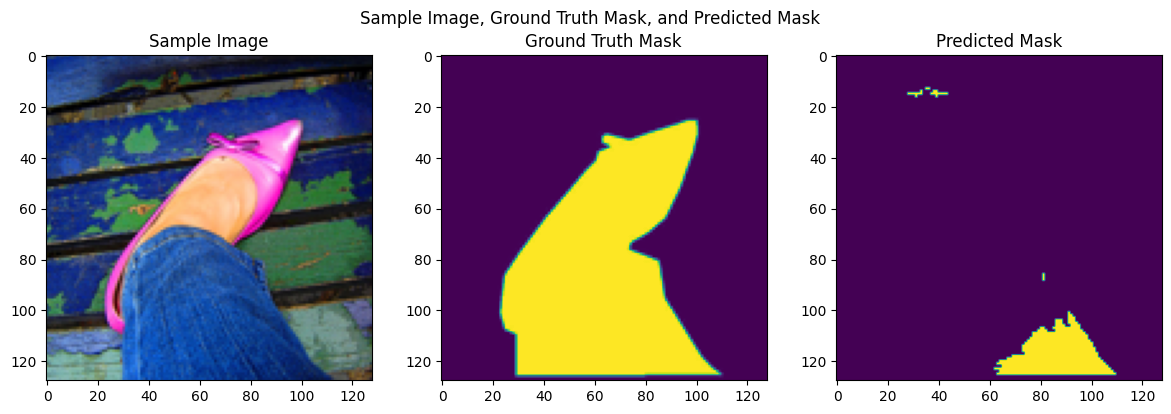

In [ ]:
# Get a sample batch from the validation data generator
sample_images, sample_masks = val_generator[0]

# Generate predictions on the sample batch
predictions = model.predict(sample_images)

# Threshold the predictions (if needed)
threshold = 0.5  # Adjust the threshold as per your requirement
thresholded_predictions = (predictions > threshold).astype(np.uint8)

# Select a random index from the batch
idx = np.random.randint(0, sample_images.shape[0])

# Plot the sample image, ground truth mask, and predicted mask
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot sample image
axes[0].imshow(sample_images[idx])
axes[0].set_title('Sample Image')

# Plot ground truth mask
axes[1].imshow(sample_masks[idx])
axes[1].set_title('Ground Truth Mask')

# Plot predicted mask
axes[2].imshow(thresholded_predictions[idx])
axes[2].set_title('Predicted Mask')

# Set common title for the figure
fig.suptitle('Sample Image, Ground Truth Mask, and Predicted Mask')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()
